In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Data/data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
379212,569680,23295,SET OF 12 MINI LOAF BAKING CASES,8,2011-10-05 14:28:00,0.83,16803.0,United Kingdom
142647,548621,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,2,2011-04-01 11:54:00,1.25,16960.0,United Kingdom
328689,565801,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,10,2011-09-07 10:28:00,0.85,12685.0,France
157976,550216,22653,BUTTON BOX,10,2011-04-15 11:06:00,1.95,13516.0,United Kingdom
522159,580378,22792,damages,-73,2011-12-02 17:56:00,0.00,NaN,United Kingdom


In [6]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
data = data[(data['Quantity'] >0) & (data['UnitPrice']>0)]
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [8]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [9]:
data = data.dropna(subset=["CustomerID"])
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data.duplicated().value_counts()

False    392692
True       5192
Name: count, dtype: int64

In [11]:
data=data.drop_duplicates()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [13]:
data.to_csv('Data/Data_ok.csv')

In [14]:
import datetime

current_date = max(data['InvoiceDate'] + datetime.timedelta(days=1))

In [15]:
data['Sales'] = (data['Quantity'] * data['UnitPrice']).round(2)

In [16]:
df_RFM = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - max(x)).days,
    'InvoiceNo': 'count',
    'Sales': 'sum'
}).round(2)

In [17]:
df_RFM.sample(5)

,InvoiceDate,InvoiceNo,Sales
CustomerID,,,
14566.0,111,4,1432.00
13534.0,2,296,5870.08
15423.0,38,2,43.50
15919.0,20,122,525.69
15669.0,40,33,684.34


In [18]:
df_RFM = df_RFM.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo':'Frequency','Sales': 'Monetary'})
df_RFM.sample(5)

,Recency,Frequency,Monetary
CustomerID,,,
17787.0,153,128,1817.54
14142.0,373,22,311.81
18116.0,68,371,1403.11
13188.0,11,2,114.60
17213.0,40,157,2781.23


In [19]:
df_RFM['r_recency'] = pd.qcut(df_RFM['Recency'], 5, ['5', '4', '3', '2', '1'])
df_RFM['r_frequency'] = pd.qcut(df_RFM['Frequency'], 5, ['1', '2', '3', '4', '5'])
df_RFM['r_monetary'] = pd.qcut(df_RFM['Monetary'], 5, ['1', '2', '3', '4', '5'])


In [20]:
df_RFM.head()

,Recency,Frequency,Monetary,r_recency,r_frequency,r_monetary
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


In [21]:
df_RFM['RFM_Score'] = df_RFM['r_recency'].astype(str) + df_RFM['r_frequency'].astype(str) + df_RFM['r_monetary'].astype(str)

In [22]:
df_RFM.sample(5)

,Recency,Frequency,Monetary,r_recency,r_frequency,r_monetary,RFM_Score
CustomerID,,,,,,,
15187.0,2,91,4777.18,5,4,5,545
14860.0,19,11,170.32,4,1,1,411
18037.0,154,19,70.02,2,2,1,221
14298.0,8,1637,51527.30,5,5,5,555
13670.0,75,25,349.70,2,2,2,222


In [23]:
df_RFM.to_csv('Data/AnalystRFM.csv')

### Phân cụm sử dụng K-mean

In [24]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency      4338 non-null   int64   
 1   Frequency    4338 non-null   int64   
 2   Monetary     4338 non-null   float64 
 3   r_recency    4338 non-null   category
 4   r_frequency  4338 non-null   category
 5   r_monetary   4338 non-null   category
 6   RFM_Score    4338 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 182.8+ KB


In [25]:
df_RFM.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.00000
mean,92.536422,90.523744,2048.68808
std,100.014169,225.506968,8985.23022
min,1.000000,1.000000,3.75000
25%,18.000000,17.000000,306.48250
50%,51.000000,41.000000,668.57000
75%,142.000000,98.000000,1660.59750
max,374.000000,7676.000000,280206.02000


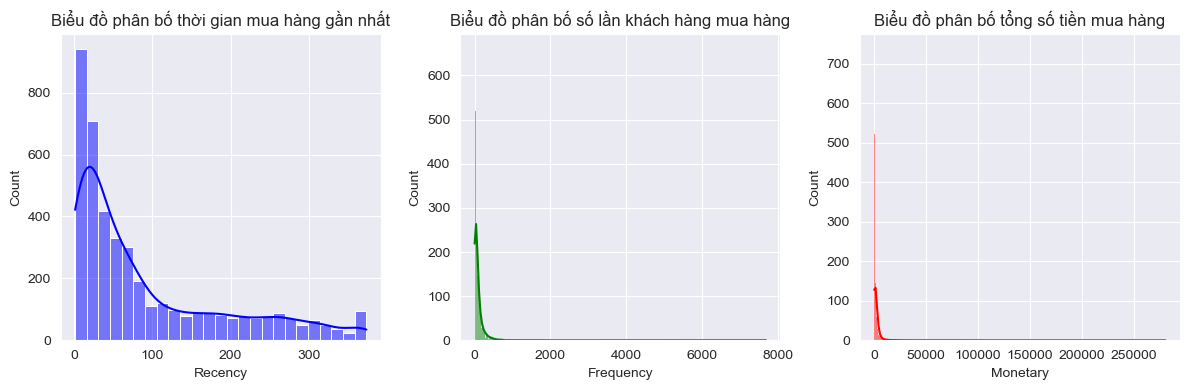

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data=df_RFM, x = 'Recency',kde=True, color='Blue')
plt.title("Biểu đồ phân bố thời gian mua hàng gần nhất")

plt.subplot(1,3,2)
sns.histplot(data=df_RFM, x ='Frequency',kde=True, color='Green')
plt.title("Biểu đồ phân bố số lần khách hàng mua hàng")

plt.subplot(1,3,3)
sns.histplot(data=df_RFM, x ='Monetary',kde=True, color='red')
plt.title("Biểu đồ phân bố tổng số tiền mua hàng")

plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

features = ['Recency', 'Frequency', 'Monetary']
X = df_RFM[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled

array([[ 2.33457414e+00, -3.97034578e-01,  8.36301037e+00],
       [-9.05340320e-01,  4.05693902e-01,  2.51698905e-01],
       [-1.75359593e-01, -2.63985659e-01, -2.79878268e-02],
       ...,
       [-8.45341904e-01, -3.48249975e-01, -2.08214334e-01],
       [-8.85340848e-01,  2.79613949e+00, -3.51515069e-04],
       [-4.95351144e-01, -9.10220638e-02, -2.35311111e-02]])

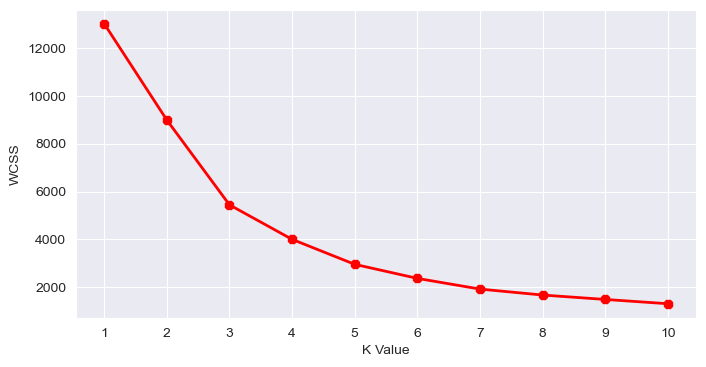

In [29]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,4))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.grid()
plt.show()


In [30]:
k=5
model = KMeans(n_clusters=k, random_state=42)
model.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [31]:
df_RFM['Cluster'] = model.labels_
df_RFM.head()

,Recency,Frequency,Monetary,r_recency,r_frequency,r_monetary,RFM_Score,Cluster
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,4
12347.0,2,182,4310.00,5,5,5,555,0
12348.0,75,31,1797.24,2,3,4,234,0
12349.0,19,73,1757.55,4,4,4,444,0
12350.0,310,17,334.40,1,2,2,122,2


In [32]:
df_RFM.groupby('Cluster').agg({
    'Recency': ['mean','min','max'],
    'Frequency': ['mean','min','max'],
    'Monetary': ['mean','min','max']
}).round(2)

Recency           Frequency               Monetary             \
           mean  min  max      mean   min   max       mean        min   
Cluster                                                                 
0         44.35    1  156     72.06     1   342    1328.74       6.20   
1          7.67    1   24    825.83     3  2076  190808.54  117210.08   
2        249.48  146  374     27.41     1   297     488.76       3.75   
3          2.00    1    4   5717.25  4412  7676   70612.25   33053.19   
4         16.25    1  326    474.06     1  2677   11751.64    1071.73   

                    
               max  
Cluster             
0         16209.50  
1        280206.02  
2          9864.26  
3        143711.17  
4         91062.38

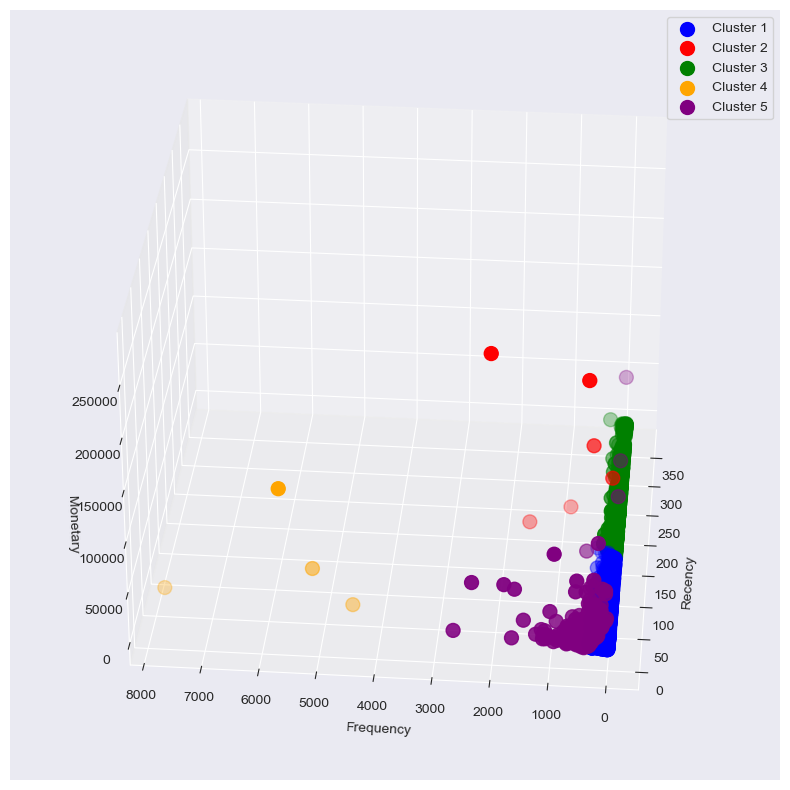

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Tạo figure và ax 3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot từng cluster với màu sắc khác nhau
ax.scatter(
    df_RFM.Recency[df_RFM.Cluster == 0], 
    df_RFM.Frequency[df_RFM.Cluster == 0], 
    df_RFM.Monetary[df_RFM.Cluster == 0], 
    c='blue', s=100, label='Cluster 1'
)

ax.scatter(
    df_RFM.Recency[df_RFM.Cluster == 1], 
    df_RFM.Frequency[df_RFM.Cluster == 1], 
    df_RFM.Monetary[df_RFM.Cluster == 1], 
    c='red', s=100, label='Cluster 2'
)

ax.scatter(
    df_RFM.Recency[df_RFM.Cluster == 2], 
    df_RFM.Frequency[df_RFM.Cluster == 2], 
    df_RFM.Monetary[df_RFM.Cluster == 2], 
    c='green', s=100, label='Cluster 3'
)

ax.scatter(
    df_RFM.Recency[df_RFM.Cluster == 3], 
    df_RFM.Frequency[df_RFM.Cluster == 3], 
    df_RFM.Monetary[df_RFM.Cluster == 3], 
    c='orange', s=100, label='Cluster 4'
)

ax.scatter(
    df_RFM.Recency[df_RFM.Cluster == 4], 
    df_RFM.Frequency[df_RFM.Cluster == 4], 
    df_RFM.Monetary[df_RFM.Cluster == 4], 
    c='purple', s=100, label='Cluster 5'
)

# Tùy chỉnh góc nhìn và nhãn
ax.view_init(30, 185)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.legend()
plt.show()
